### Actividad 11 - Punto 4

#### Instalacion de librerias

In [3]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from minisom import MiniSom
from librosa import feature

In [7]:
from scipy.io import wavfile
import os

In [8]:
from sklearn.decomposition import FastICA

In [9]:
WAV_DIR = 'wav'

numeric_label = {
    'Aeropuerto': 0,
    'Ciudad': 1,
    'Parque': 2,
    'Restaurante': 3
}

features_func_list = [
    feature.chroma_stft,
    feature.spectral_centroid,
    feature.spectral_bandwidth,
    feature.spectral_rolloff
]

features_func_label = (
'chroma_stft',
'spectral_centroid',
'spectral_bandwidth',
'spectral_rolloff'
)

In [10]:
def apply_fastICA(audio, n_component):
    ica = FastICA(n_components=n_component, whiten='unit-variance')
    S_ = ica.fit_transform(audio)
    A_ = ica.mixing_
    
    return (S_, S_[:,1], A_)

In [11]:
def get_audio_features(audio, audio_sampling_rate):
    features_list = []
    for feature_function in features_func_list:
        features_list.append(np.mean(feature_function(y=audio, sr=audio_sampling_rate)))
    return features_list

#### Lectura de los archivos WAV, FastICA y Extraccion de Caracteristicas

In [12]:
# lee el archivo wav, aplica FastICA y extrae las caracteristicas del sonido de ruido
def get_audio_ds():
    files_list = []
    for i in os.listdir(WAV_DIR):
        file_path = os.path.join(WAV_DIR, i)
        if os.path.isfile(file_path) and file_path.endswith('.wav'):
            # import wav file
            sampling_rate, audio = wavfile.read(file_path)
            # apply fastICA
            s_, s_ruido, a_ = apply_fastICA(audio, 2)
            # get features for s_ruido
            audio_features = get_audio_features(s_ruido, sampling_rate)
            
            file_dic = { 'file_name': i, 
                         'sampling_rate': sampling_rate, 
                         'audio': audio, 
                         'audio_shape': audio.shape, 
                         'area': i.split('_')[0],
                         'area_number': numeric_label[i.split('_')[0]],
                         'S_': s_,
                         'S_ruido': s_ruido,
                         'A_': a_,
                         'S_ruido_features': audio_features,
                         'S_ruido_labels': features_func_label
                       }
            files_list.append(file_dic)
    return files_list

In [13]:
wav_files = get_audio_ds()

#### Creacion del dataset de las caracteristicas del audio de ruido y su etiquetado

In [14]:
audio_dataset = np.array([f['S_ruido_features'] + [f['area_number']] for f in wav_files])

In [15]:
audio_dataset

array([[4.72715586e-01, 2.13088807e+03, 3.09501985e+03, 3.83822155e+03,
        0.00000000e+00],
       [4.76226253e-01, 2.02406028e+03, 2.90764551e+03, 3.54337268e+03,
        0.00000000e+00],
       [4.72878074e-01, 2.27136034e+03, 3.11921862e+03, 3.89954478e+03,
        0.00000000e+00],
       [4.92402193e-01, 5.30134061e+03, 5.42329225e+03, 1.09712328e+04,
        0.00000000e+00],
       [4.74051323e-01, 2.28667453e+03, 3.03974430e+03, 4.18927739e+03,
        1.00000000e+00],
       [4.14280897e-01, 4.35928006e+03, 4.17883037e+03, 7.34376131e+03,
        1.00000000e+00],
       [4.83660566e-01, 2.16952394e+03, 2.80835386e+03, 3.86195637e+03,
        1.00000000e+00],
       [4.79989385e-01, 2.33599122e+03, 3.01353758e+03, 4.20988219e+03,
        1.00000000e+00],
       [4.83766187e-01, 2.59767939e+03, 3.28607652e+03, 4.63319637e+03,
        2.00000000e+00],
       [4.50786569e-01, 4.57480972e+03, 4.13923341e+03, 7.09739915e+03,
        2.00000000e+00],
       [4.67094420e-01, 4.6303

In [16]:
# caracteristicas
audio_data = audio_dataset[:,:-1]
# etiquetado
audio_label = audio_dataset[:,-1]

In [17]:
# normalizacion de los datos de las caracteristicas
audio_data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, audio_data)
audio_data

array([[8.80062752e-05, 3.96711104e-01, 5.76205179e-01, 7.14568320e-01],
       [9.50426217e-05, 4.03950841e-01, 5.80291932e-01, 7.07166870e-01],
       [8.61988805e-05, 4.14036365e-01, 5.68588751e-01, 7.10831002e-01],
       [3.69191094e-05, 3.97481523e-01, 4.06625158e-01, 8.22596145e-01],
       [8.37763967e-05, 4.04110996e-01, 5.37196738e-01, 7.40347189e-01],
       [4.35730978e-05, 4.58498902e-01, 4.39519624e-01, 7.72399673e-01],
       [9.22163804e-05, 4.13648866e-01, 5.35450367e-01, 7.36333831e-01],
       [8.45065197e-05, 4.11272612e-01, 5.30560844e-01, 7.41188250e-01],
       [7.74519311e-05, 4.15893649e-01, 5.26107403e-01, 7.41783976e-01],
       [4.79356209e-05, 4.86474885e-01, 4.40156689e-01, 7.54721321e-01],
       [4.67708404e-05, 4.63641154e-01, 4.40597314e-01, 7.68707282e-01],
       [4.37147693e-05, 4.59579707e-01, 4.35629519e-01, 7.73959568e-01],
       [7.65458271e-05, 3.94949259e-01, 5.51557935e-01, 7.34710093e-01],
       [7.83699714e-05, 3.92337554e-01, 5.60307309e

In [18]:
# separacion de los datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(audio_data, audio_label, test_size=0.33, random_state=42)

#### Mapa autoorganizado

In [19]:
from minisom import MiniSom
som = MiniSom(1,4,4 ,sigma=0.5,learning_rate=0.5,neighborhood_function="gaussian") 

In [20]:
som.train(X_train, 3000)

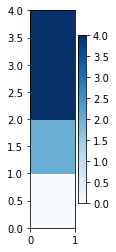

In [21]:
plt.figure(figsize=(1,4))
frequencies = som.activation_response(X_train)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

#### Referencia Label y Color

In [22]:
colors = ["orange", "blue", "red","green"]
categorical_label = dict(map(reversed, numeric_label.items()))

for c in range(4):
    print(f'Label Number: {int(c)}, Label Name: {categorical_label[int(c)]}, Label Color: {colors[int(c)]}')

Label Number: 0, Label Name: Aeropuerto, Label Color: orange
Label Number: 1, Label Name: Ciudad, Label Color: blue
Label Number: 2, Label Name: Parque, Label Color: red
Label Number: 3, Label Name: Restaurante, Label Color: green


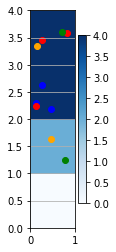

In [23]:
w_x, w_y = zip(*[som.winner(d) for d in X_train])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(1,4))
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()

for c in np.unique(y_train):
    idx_target = y_train==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, c=colors[int(c)] )

plt.grid()
plt.show()

#### Ploteo Datos de Testing

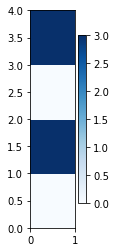

In [24]:
plt.figure(figsize=(1,4))
frequencies = som.activation_response(X_test)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

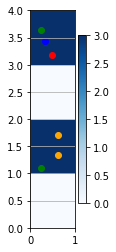

In [25]:
w_x, w_y = zip(*[som.winner(d) for d in X_test])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(1,4))
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()

for c in np.unique(y_test):
    idx_target = y_test==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, c=colors[int(c)] )

plt.grid()
plt.show()